In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, mimread

In [64]:
# Focal length:
fc = [ 585.850107917267790 , 586.003198722303180 ]

# Principal point:
cc = [ 664.903569991381570 , 498.409524449186850 ]

# Skew coefficient:
alpha_c = 0.000000000000000

# Distortion coefficients:
kc = [ -0.159950393345315 , 0.000000000000000 , -0.000685869015729 , -0.004896132860374 , 0.000000000000000 ]

# Focal length uncertainty:
fc_error = [ 8.710017825595292 , 8.939613454740497 ]

# Principal point uncertainty:
cc_error = [ 5.809944557431711 , 7.463027311611222 ]

# Skew coefficient uncertainty:
alpha_c_error = 0.000000000000000,

# Distortion coefficients uncertainty:
kc_error = [ 0.005683206262503 , 0.000000000000000 , 0.002055303935265 , 0.001210028314335 , 0.000000000000000 ]

# Image size:
nx = 1280,
ny = 960,


# Various other variables (may be ignored if you do not use the Matlab Calibration Toolbox):
# Those variables are used to control which intrinsic parameters should be optimized

n_ima = 14,						# Number of calibration images
est_fc = [ 1 , 1 ]					# Estimation indicator of the two focal variables
est_aspect_ratio = 1,				# Estimation indicator of the aspect ratio fc(2)/fc(1)
center_optim = 1,					# Estimation indicator of the principal point
est_alpha = 0,						# Estimation indicator of the skew coefficient
est_dist = [ 1 , 0 , 1 , 1 , 0 ]	# Estimation indicator of the distortion coefficients


# Extrinsic parameters:
# The rotation (omc_kk) and the translation (Tc_kk) vectors for every calibration image and their uncertainties

# Image #1:
omc_1 = [ 1.948720e+00 , 1.734774e+00 , -7.312483e-01 ]
Tc_1  = [ -4.111777e+01 , 2.856973e+01 , 3.730695e+02 ]
omc_error_1 = [ 1.860907e-02 , 1.346996e-02 , 2.566050e-02 ]
Tc_error_1  = [ 3.648280e+00 , 4.909893e+00 , 5.330259e+00 ]

# Image #2:
omc_2 = [ 2.192334e+00 , 2.228948e+00 , -9.803712e-02 ]
Tc_2  = [ -1.012203e+02 , -7.236369e+01 , 3.757402e+02 ]
omc_error_2 = [ 2.318373e-02 , 2.073037e-02 , 4.608548e-02 ]
Tc_error_2  = [ 3.788215e+00 , 4.845134e+00 , 7.613886e+00 ]

# Image #3:
omc_3 = [ -1.969224e+00 , -1.898970e+00 , 5.316389e-01 ]
Tc_3  = [ -4.397710e+01 , -5.106409e+01 , 4.372313e+02 ]
omc_error_3 = [ 1.600213e-02 , 2.026732e-02 , 3.544043e-02 ]
Tc_error_3  = [ 4.523393e+00 , 5.450090e+00 , 6.425467e+00 ]

# Image #4:
omc_4 = [ -2.138098e+00 , -2.208260e+00 , 6.679968e-02 ]
Tc_4  = [ -1.051026e+02 , -7.467864e+01 , 2.288933e+02 ]
omc_error_4 = [ 9.161117e-03 , 1.103050e-02 , 2.063895e-02 ]
Tc_error_4  = [ 2.305705e+00 , 2.993409e+00 , 4.010838e+00 ]

# Image #5:
omc_5 = [ 2.185272e+00 , 2.208435e+00 , -8.670933e-02 ]
Tc_5  = [ -1.199799e+02 , 1.087926e+01 , 3.551420e+02 ]
omc_error_5 = [ 2.114055e-02 , 1.631258e-02 , 3.840224e-02 ]
Tc_error_5  = [ 3.623727e+00 , 4.712368e+00 , 7.005938e+00 ]

# Image #6:
omc_6 = [ -1.876948e+00 , -1.860185e+00 , -6.403422e-01 ]
Tc_6  = [ -1.398462e+02 , -9.852354e+01 , 2.608548e+02 ]
omc_error_6 = [ 1.358153e-02 , 1.393206e-02 , 2.360289e-02 ]
Tc_error_6  = [ 2.807452e+00 , 3.672910e+00 , 5.429992e+00 ]

# Image #7:
omc_7 = [ 1.748922e+00 , 2.075901e+00 , 7.593696e-01 ]
Tc_7  = [ -1.142473e+02 , -1.061052e+02 , 2.301220e+02 ]
omc_error_7 = [ 1.268242e-02 , 1.366871e-02 , 2.551346e-02 ]
Tc_error_7  = [ 2.855630e+00 , 3.204996e+00 , 5.277108e+00 ]

# Image #8:
omc_8 = [ 2.027029e+00 , 1.940103e+00 , 4.085146e-01 ]
Tc_8  = [ -8.252014e+01 , -7.097811e+01 , 2.619068e+02 ]
omc_error_8 = [ 1.415234e-02 , 1.149910e-02 , 2.483267e-02 ]
Tc_error_8  = [ 2.891911e+00 , 3.456301e+00 , 5.482608e+00 ]

# Image #9:
omc_9 = [ 1.934386e+00 , 2.009448e+00 , 3.962523e-01 ]
Tc_9  = [ -5.073964e+01 , -8.468756e+01 , 2.217916e+02 ]
omc_error_9 = [ 1.254191e-02 , 9.654413e-03 , 2.027194e-02 ]
Tc_error_9  = [ 2.406195e+00 , 2.892179e+00 , 4.474065e+00 ]

# Image #10:
omc_10 = [ 1.904972e+00 , 1.886187e+00 , -5.349879e-01 ]
Tc_10  = [ -9.897019e+01 , -1.743394e+01 , 3.055541e+02 ]
omc_error_10 = [ 1.401635e-02 , 1.239879e-02 , 2.160791e-02 ]
Tc_error_10  = [ 2.884596e+00 , 3.962463e+00 , 4.707332e+00 ]

# Image #11:
omc_11 = [ 1.863954e+00 , 1.824946e+00 , -5.860482e-01 ]
Tc_11  = [ -1.216810e+02 , -1.096294e+02 , 2.106130e+02 ]
omc_error_11 = [ 9.056124e-03 , 1.024135e-02 , 1.345441e-02 ]
Tc_error_11  = [ 1.977966e+00 , 2.664789e+00 , 3.138793e+00 ]

# Image #12:
omc_12 = [ -2.207390e+00 , -2.231516e+00 , -5.215396e-02 ]
Tc_12  = [ -1.065682e+02 , -6.752053e+01 , 3.325670e+02 ]
omc_error_12 = [ 1.700445e-02 , 1.944416e-02 , 3.874714e-02 ]
Tc_error_12  = [ 3.451388e+00 , 4.379119e+00 , 6.708630e+00 ]

# Image #13:
omc_13 = [ -2.108843e+00 , -2.124261e+00 , 1.731922e-01 ]
Tc_13  = [ -1.400201e+02 , -9.297711e+01 , 2.864966e+02 ]
omc_error_13 = [ 1.210846e-02 , 1.219192e-02 , 2.442164e-02 ]
Tc_error_13  = [ 2.771736e+00 , 3.701584e+00 , 4.898322e+00 ]

# Image #14:
omc_14 = [ -2.204284e+00 , -1.954050e+00 , 3.754358e-01 ]
Tc_14  = [ -1.191978e+02 , 5.401369e+01 , 4.389046e+02 ]
omc_error_14 = [ 1.607911e-02 , 2.152511e-02 , 3.758013e-02 ]
Tc_error_14  = [ 4.288471e+00 , 5.711067e+00 , 7.296132e+00 ]


In [1]:

def show_img(img):
    plt.figure(figsize=(30,15))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    

In [100]:
imgs = !ls 3-pattern
resize_size = (640, 480)

def load_image(img):
    image = imread(f'3-pattern/{img}')
    if image.shape[0] > image.shape[1]:
        image = image.transpose(1,0,2)
#     return image
    return cv2.resize(image, (image.shape[1] // 1, image.shape[0] // 1))
    
    

pattern_images = [load_image(i) for i in imgs]


In [131]:
# for i in pattern_images:
#     show_img(i)
pattern_images[0].shape

(3024, 4032, 3)

# 1

In [102]:
objp = np.zeros((6 * 8,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)

In [103]:
objpoints = []
imgpoints = []

Displaying image  1


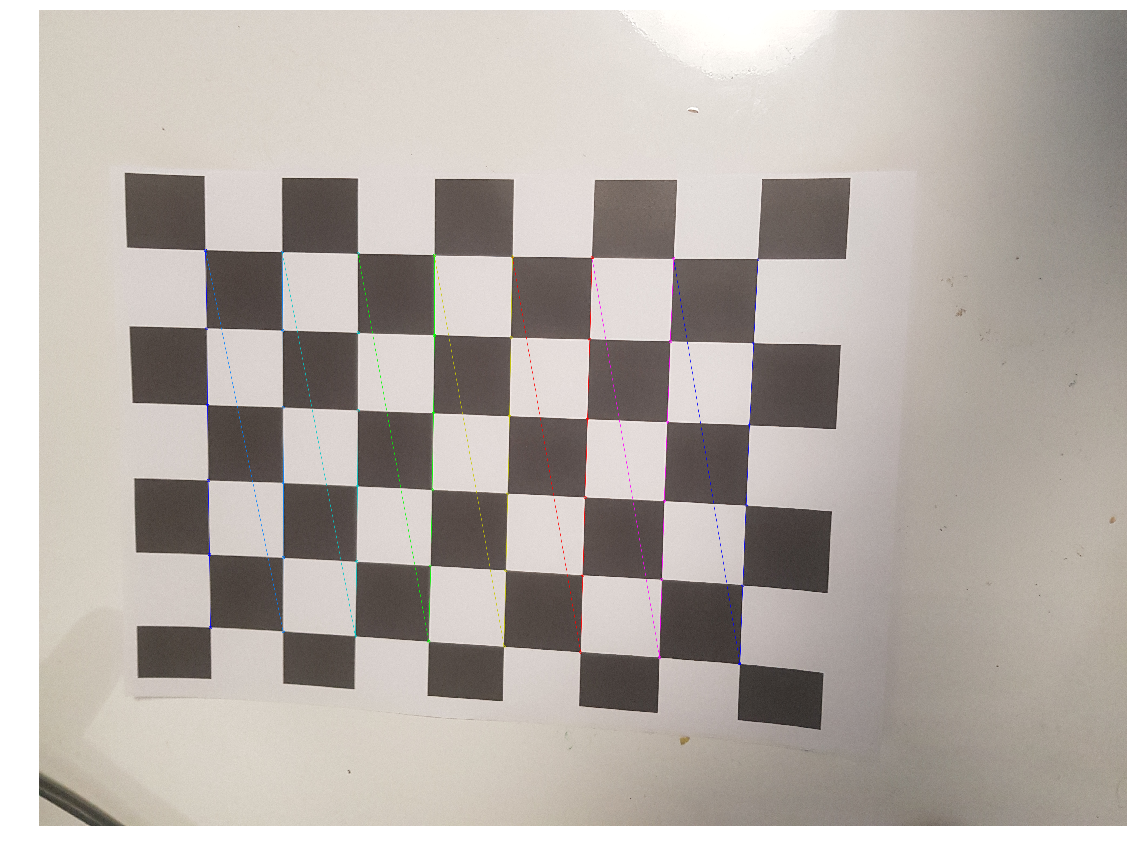

Displaying image  5


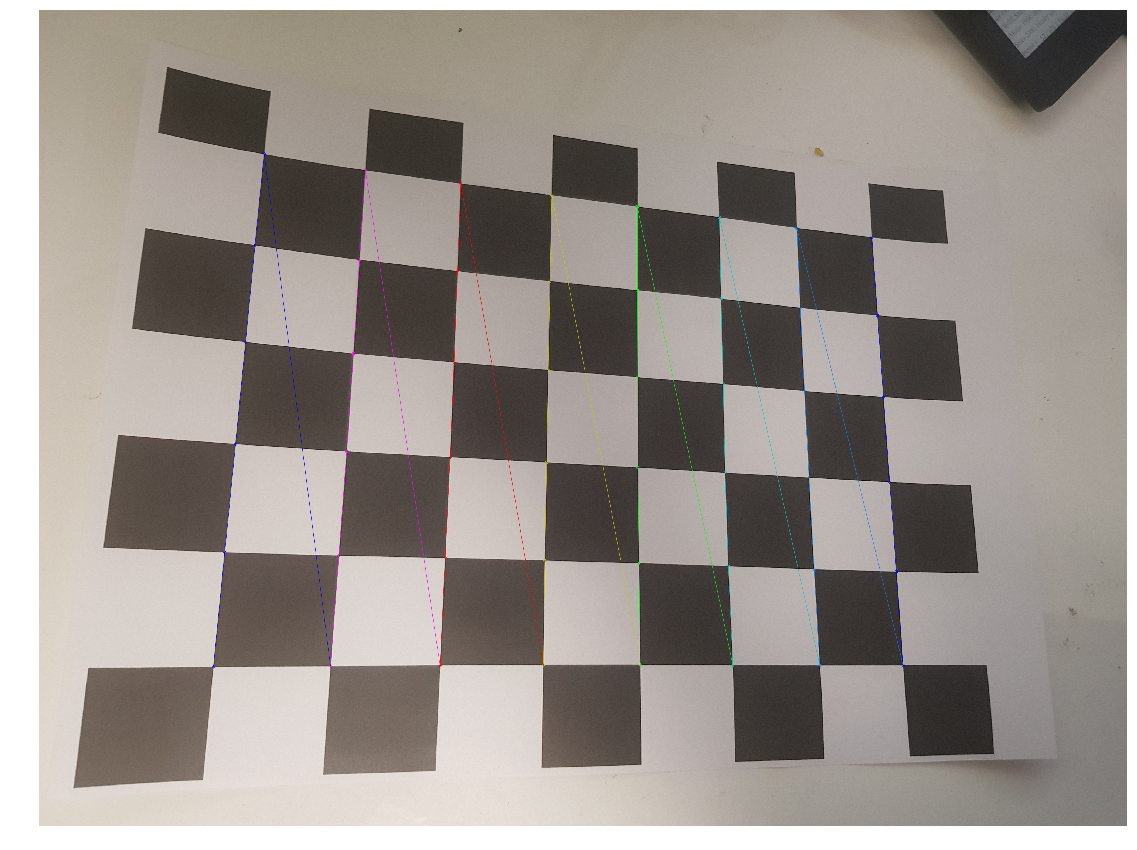

Displaying image  9


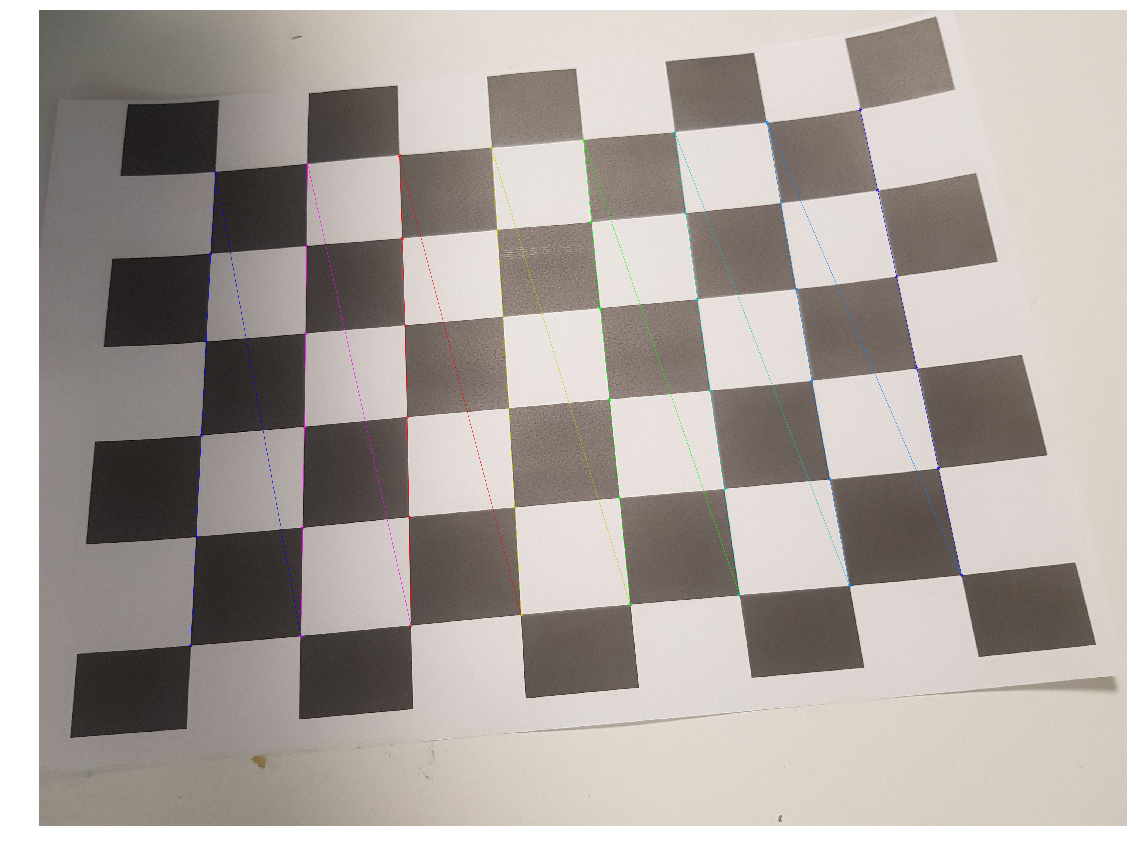

Displaying image  13


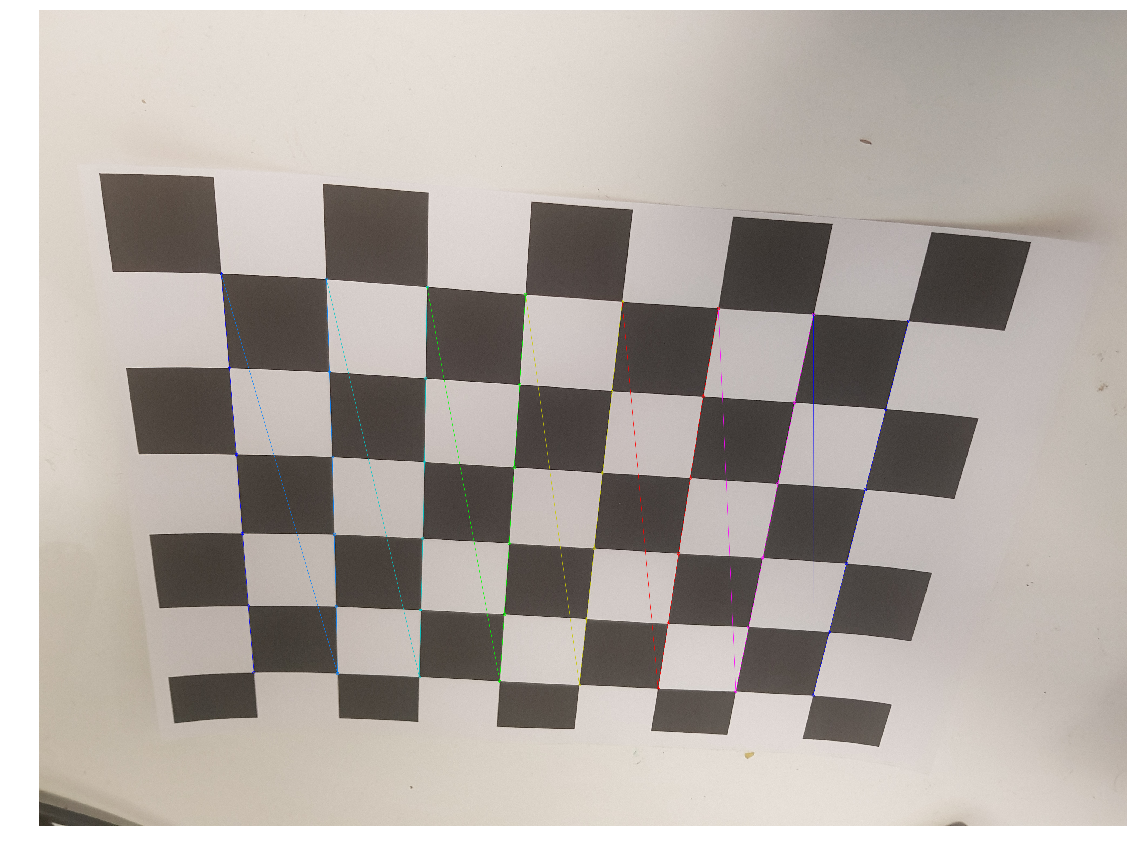

In [104]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

for (i, img) in enumerate(pattern_images):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (6, 8), None)
    
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        
        img = cv2.drawChessboardCorners(img, (6, 8), corners2, ret)
        if i % 4 == 0:
            print('Displaying image ', i + 1)
            show_img(img)
    else:
        print(f'Image {i +1} failed to get corners')
        show_img(gray)

In [105]:
# ret = retval ??
# mtx = camera matrix
# dist = distortion coefficients 
# rvecs = rotation vectors for each image
# tvecs = translation vectors for each image
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=objpoints,
    imagePoints=imgpoints,
    imageSize=gray.shape,
    cameraMatrix=None,
    distCoeffs=None)


In [133]:
print(ret, '\n')
print(mtx, '\n')
print(dist, '\n')
print(rvecs, len(rvecs), '\n')
print(tvecs, len(tvecs), '\n')

3.732134562601737 

[[3.22613274e+03 0.00000000e+00 1.95581842e+03]
 [0.00000000e+00 3.22929681e+03 1.50711117e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

[[ 0.06130356  0.47715583 -0.00265076 -0.0047486  -1.84604985]] 

[array([[-0.03829638],
       [ 0.17205231],
       [-1.53565046]]), array([[ 0.11181763],
       [ 0.44537478],
       [-1.50790569]]), array([[-0.3354535 ],
       [ 0.54564828],
       [ 1.52385821]]), array([[0.00488235],
       [0.16003458],
       [1.51453675]]), array([[-0.37571395],
       [-0.0147982 ],
       [ 1.5956399 ]]), array([[ 0.36895391],
       [-0.07861692],
       [ 1.52440857]]), array([[-0.56535933],
       [-0.01546308],
       [ 1.4972453 ]]), array([[0.4079654 ],
       [0.00257613],
       [1.35011202]]), array([[-0.22719392],
       [ 0.27632351],
       [ 1.46866076]]), array([[-0.43403159],
       [ 0.32501404],
       [ 1.38149442]]), array([[0.28487116],
       [0.34734686],
       [1.50410985]]), array([[0.44849584],
      

In [128]:
mtx[0, 0] * (8 / 4000)

6.4522654835067215

In [129]:
mtx[1, 1] * (6 / 3000)

6.458593623907255

Tried to get to the focal lengths for the camera that are reported, but if my calculations are correct, the results are very far. Supposedly the focal length should be 26mm according to some specs so if that is true these values are pretty far away. If they even are correct.

# 2

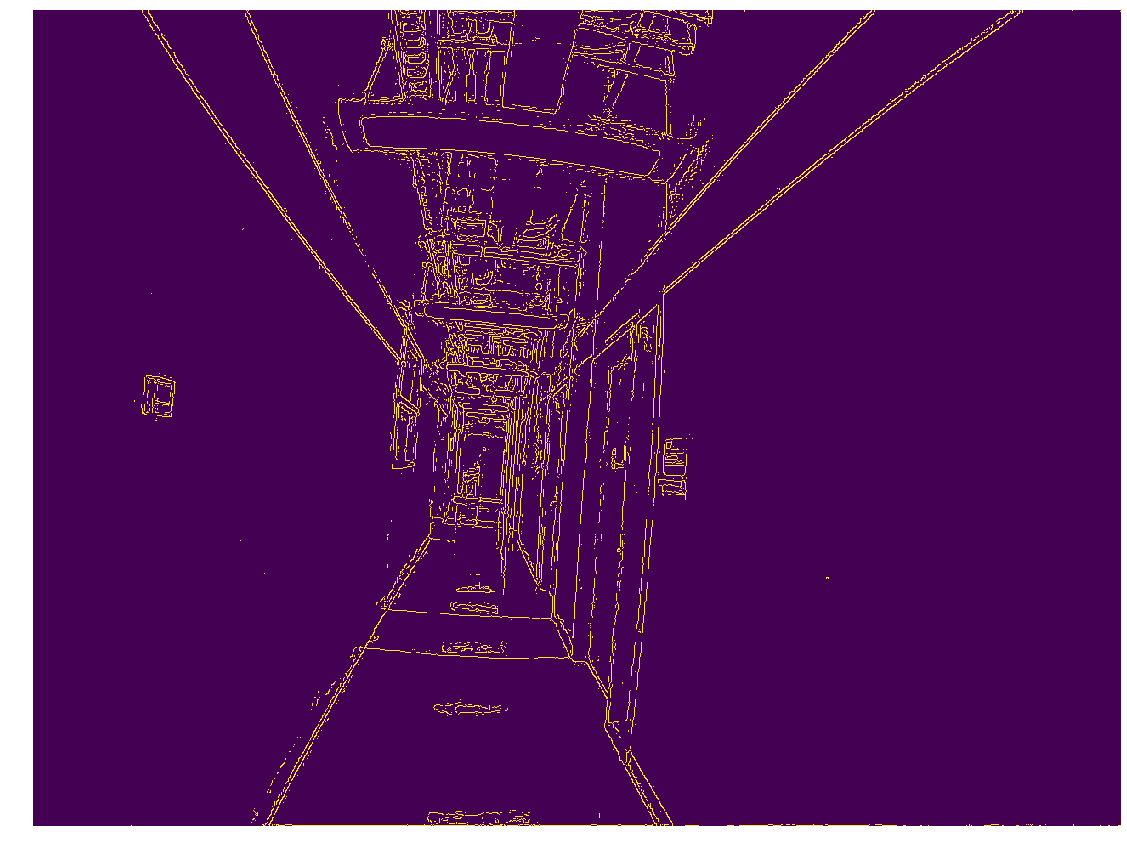

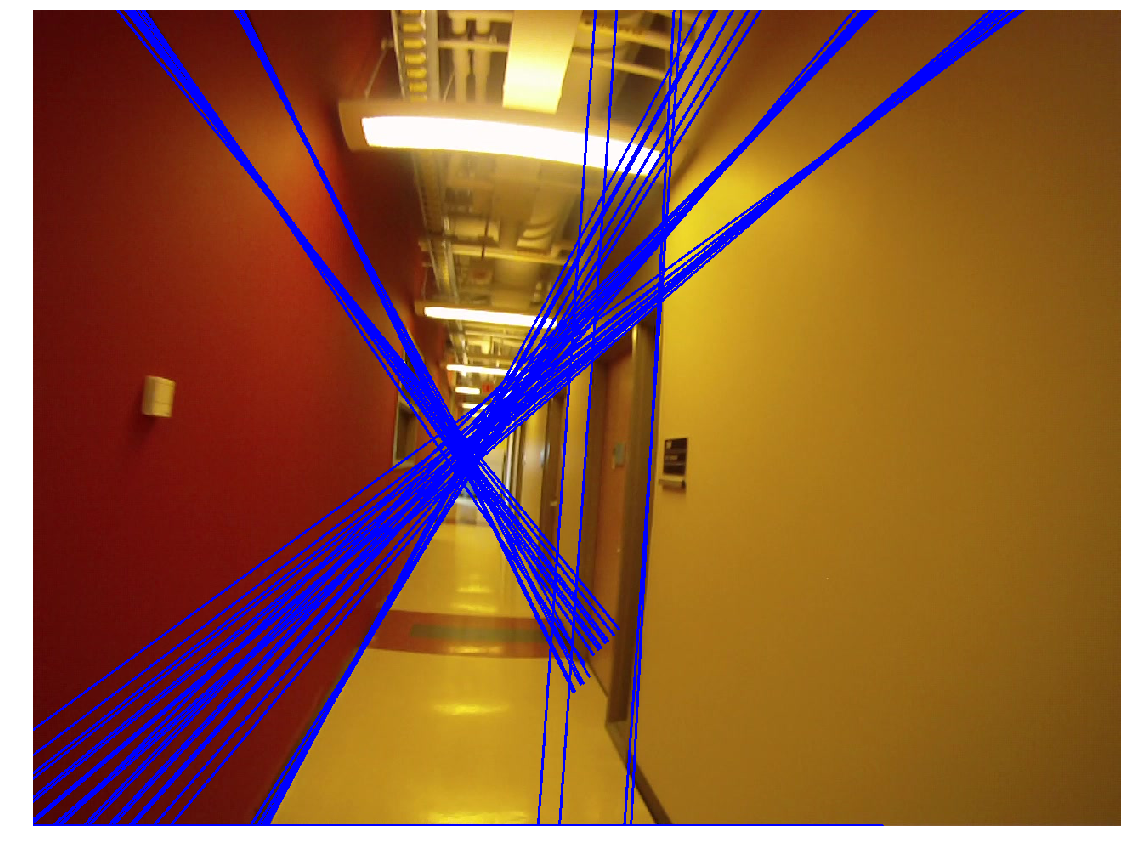

In [122]:
from itertools import starmap

corr1 = np.array(imread('3-Corridor1.jpg'))
corr2 = np.array(imread('3-Corridor2.jpg'))

gray = cv2.cvtColor(corr1, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 35, 35, True)
show_img(edges)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

h_lines = []

for l in lines:
    rho, theta = l[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(corr1,(x1,y1),(x2,y2),(0,0,255),2)
    h_lines.append(((x1,y1),(x2,y2)))

# minLineLength = 100
# maxLineGap = 10

# lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

# for el in lines:
#     x1,y1,x2,y2 = el[0]
#     cv2.line(gray,(x1,y1),(x2,y2),(0,255,0),2)
    
show_img(corr1)


# 2.1

In [17]:
thetas = np.deg2rad(np.arange(-90.0, 90.0, 1))
width, height = edges.shape
diag = int(round(np.sqrt(width * width + height * height)))
sin_t = np.sin(thetas)
len_t = len(thetas)
cos_t = np.cos(thetas)
accumulator = np.zeros((2 * diag, len_t), dtype=np.uint8)

all_edges = edges < 255
ys, xs = np.nonzero(all_edges)

for i in range(len(xs)):
    x = xs[i]
    y = ys[i]
    for theta in range(len_t):
        rho = diag + int(round(x * cos_t[theta] + y * sin_t[theta]))
        accumulator[rho, theta] += 1

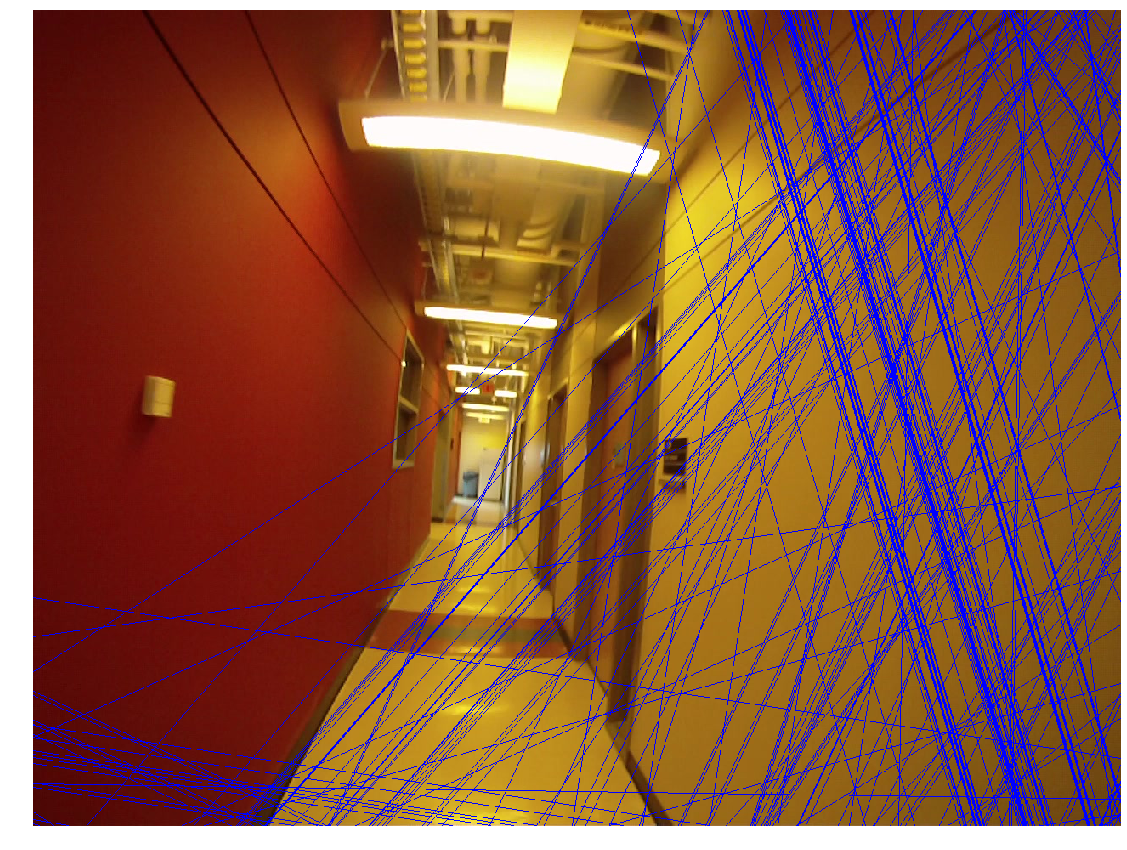

2270 total lines above arbitrary threshold


In [98]:
corr1 = np.array(imread('3-Corridor1.jpg'))

for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
        if accumulator[int(y)][int(x)] > 253:
            rho, theta = y, x
            xx = np.arange(-10000, 10000, 1000)
            yy = (rho - xx* np.cos(theta) )/ np.sin(theta)
            cv2.line(corr1, (int(xx[0]), int(yy[0])), (int(xx[-1]), int(yy[-1])),(0,0,255),1 )

show_img(corr1)
print(np.sum(accumulator > 253), 'total lines above arbitrary threshold')

I think the Hough Line detection code should be correct, but with this large of an image it seems to be way too slow and I don't exactly know how to make it go faster. Still there clearly is something wrong in my implementation and trying to debug this with this image is not exactly simple. Maybe I should have taken a small crop and tried to see if it works with that, but right now something is clearly very wrong with it. Currently running it on the image takes about 30 minutes. Maybe somtehing about the transformations could be wrong but can't quite say.

Since the image contains 2300 lines, clearly most of them are overlapping, so I think either I found a lot of overlapping lines as was the goal or the lines are outside of the image, can't exactly say which is true.

Maybe at some point I have mixed up the coordinates and everything has failed possibly, but I already spent a lot of time on trying to get this to "work"so I won't try to debug it any further.

# 2.2

In [147]:
def det(a, b):
    return a[0] * b[1] - a[1] * b[0]

def l_intersect(line1, line2):
    x_diff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    y_diff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    div = det(x_diff, y_diff)
    if div == 0:
        return None

    d = (det(*line1), det(*line2))
    x = det(d, x_diff) / div
    y = det(d, y_diff) / div

    return x, y

def f_intersections(lines):
    intersections = []
    for i, line_1 in enumerate(lines):
        for line_2 in lines[i + 1:]:
            if not line_1 == line_2:
                intersection = l_intersect(line_1, line_2)
                if intersection:  
                    intersections.append(intersection)

    return intersections

Vanishing point


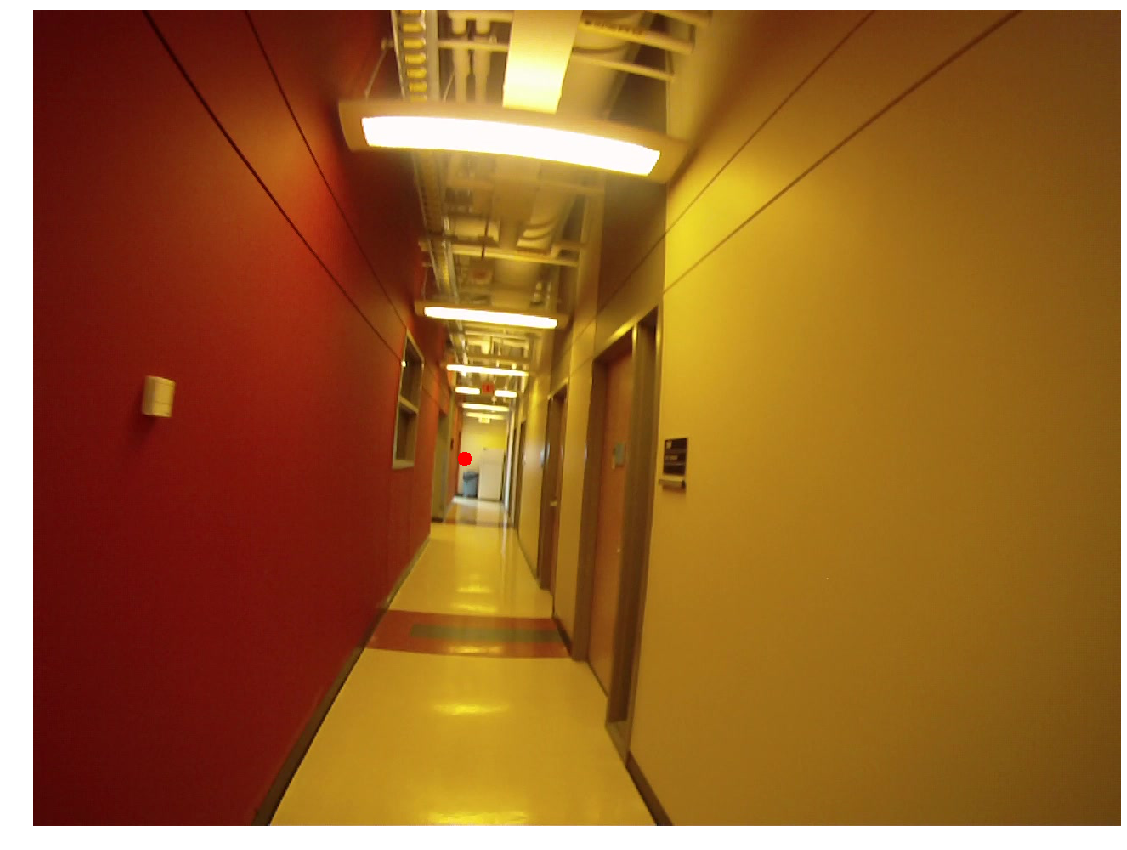

In [148]:
import itertools

corr1 = np.array(imread('3-Corridor1.jpg'))
intersections = f_intersections(h_lines)
grid_size = 5

image_height, image_width = corr1.shape[:2]

grid_rows = (image_height // grid_size) + 1
grid_columns = (image_width // grid_size) + 1

max_intersections = 0
best_cell = (0.0, 0.0)

for i, j in itertools.product(range(grid_columns),range(grid_rows)):
    cell_left = i * grid_size
    cell_right = (i + 1) * grid_size
    cell_bottom = j * grid_size
    cell_top = (j + 1) * grid_size

    current_intersections = 0
    for x, y in intersections:
        if cell_left < x < cell_right and cell_bottom < y < cell_top:
            current_intersections += 1
    if current_intersections > max_intersections:
        max_intersections = current_intersections
        best_cell = ((cell_left + cell_right) / 2, (cell_bottom + cell_top) / 2)

if best_cell[0] != None and best_cell[1] != None:
        rx1 = int(best_cell[0] - grid_size / 2)
        ry1 = int(best_cell[1] - grid_size / 2)
        rx2 = int(best_cell[0] + grid_size / 2)
        ry2 = int(best_cell[1] + grid_size / 2)
        cv2.rectangle(corr1, (rx1, ry1), (rx2, ry2), (255, 0, 0), 10)
        
print('Vanishing point')
show_img(corr1)

I made a small grid and counted the number of intersections that happen in that grid and decided that the grid square that contained the most points is where the vanishing point must be. Here it is slightly off center likely due to the distortion in the camera. And looking at the previous intersection of the Hough transform lines it kind of seems to be in the correct position. I think this is an acceptable way of finding the vanishing point.

# 2.3

Previous exercises took too long :^(